In [1]:
import pandas as pd
import numpy as np
from ftplib import FTP
import os

from datetime import datetime

# Plot
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams.update({'figure.facecolor':'white'})

In [2]:
df_m = pd.read_csv('data/masie_4km_allyears_extent_sqkm.csv')
df_m.head()

,yyyyddd,Northern_Hemisphere,Beaufort_Sea,Chukchi_Sea,East_Siberian_Sea,Laptev_Sea,Kara_Sea,Barents_Sea,Greenland_Sea,Baffin_Bay_Gulf_of_St._Lawrence,Canadian_Archipelago,Hudson_Bay,Central_Arctic,Bering_Sea,Baltic_Sea,Sea_of_Okhotsk,Yellow_Sea,Cook_Inlet
0,2006001,13034723.95,1069710.81,966006.16,1087102.72,897773.37,901663.34,432629.77,550158.41,831365.98,852715.31,1260715.19,3225371.74,639590.07,11408.53,287369.54,12152.54,6420.96
1,2006002,13034723.95,1069710.81,966006.16,1087102.72,897773.37,901663.34,432629.77,550158.41,831365.98,852715.31,1260715.19,3225371.74,639590.07,11408.53,287369.54,12152.54,6420.96
2,2006003,13170663.24,1069710.81,966006.16,1087102.72,897773.37,901663.34,432629.77,595342.42,855907.47,852715.31,1260779.00,3240507.71,666030.40,11408.53,311943.21,12152.54,6420.96
3,2006004,13409715.53,1069710.81,966006.16,1087102.72,897773.37,906439.04,458823.88,605747.86,980253.85,852715.31,1260779.00,3240326.47,683780.08,11408.53,372868.02,6989.96,6420.96
4,2006005,13416779.12,1069710.81,966006.16,1087102.72,897773.37,908697.29,474574.82,600826.71,970631.09,852715.31,1260779.00,3240326.47,683795.38,21311.46,363515.34,8240.73,8202.95


In [3]:
df_m.columns

Index(['yyyyddd', 'Northern_Hemisphere', 'Beaufort_Sea', 'Chukchi_Sea',
       'East_Siberian_Sea', 'Laptev_Sea', 'Kara_Sea', 'Barents_Sea',
       'Greenland_Sea', 'Baffin_Bay_Gulf_of_St._Lawrence',
       'Canadian_Archipelago', 'Hudson_Bay', 'Central_Arctic', 'Bering_Sea',
       'Baltic_Sea', 'Sea_of_Okhotsk', 'Yellow_Sea', 'Cook_Inlet'],
      dtype='object')

In [4]:
df_m.head()

,yyyyddd,Northern_Hemisphere,Beaufort_Sea,Chukchi_Sea,East_Siberian_Sea,Laptev_Sea,Kara_Sea,Barents_Sea,Greenland_Sea,Baffin_Bay_Gulf_of_St._Lawrence,Canadian_Archipelago,Hudson_Bay,Central_Arctic,Bering_Sea,Baltic_Sea,Sea_of_Okhotsk,Yellow_Sea,Cook_Inlet
0,2006001,13034723.95,1069710.81,966006.16,1087102.72,897773.37,901663.34,432629.77,550158.41,831365.98,852715.31,1260715.19,3225371.74,639590.07,11408.53,287369.54,12152.54,6420.96
1,2006002,13034723.95,1069710.81,966006.16,1087102.72,897773.37,901663.34,432629.77,550158.41,831365.98,852715.31,1260715.19,3225371.74,639590.07,11408.53,287369.54,12152.54,6420.96
2,2006003,13170663.24,1069710.81,966006.16,1087102.72,897773.37,901663.34,432629.77,595342.42,855907.47,852715.31,1260779.00,3240507.71,666030.40,11408.53,311943.21,12152.54,6420.96
3,2006004,13409715.53,1069710.81,966006.16,1087102.72,897773.37,906439.04,458823.88,605747.86,980253.85,852715.31,1260779.00,3240326.47,683780.08,11408.53,372868.02,6989.96,6420.96
4,2006005,13416779.12,1069710.81,966006.16,1087102.72,897773.37,908697.29,474574.82,600826.71,970631.09,852715.31,1260779.00,3240326.47,683795.38,21311.46,363515.34,8240.73,8202.95


In [5]:
df_m.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5865 entries, 0 to 5864
Data columns (total 18 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   yyyyddd                          5865 non-null   int64  
 1   Northern_Hemisphere              5865 non-null   float64
 2   Beaufort_Sea                     5865 non-null   float64
 3   Chukchi_Sea                      5865 non-null   float64
 4   East_Siberian_Sea                5865 non-null   float64
 5   Laptev_Sea                       5865 non-null   float64
 6   Kara_Sea                         5865 non-null   float64
 7   Barents_Sea                      5865 non-null   float64
 8   Greenland_Sea                    5865 non-null   float64
 9   Baffin_Bay_Gulf_of_St._Lawrence  5865 non-null   float64
 10  Canadian_Archipelago             5865 non-null   float64
 11  Hudson_Bay                       5865 non-null   float64
 12  Central_Arctic      

In [6]:
df_m.nunique()

yyyyddd                            5865
Northern_Hemisphere                5812
Beaufort_Sea                       2857
Chukchi_Sea                        3470
East_Siberian_Sea                  2827
Laptev_Sea                         2540
Kara_Sea                           4473
Barents_Sea                        4700
Greenland_Sea                      5452
Baffin_Bay_Gulf_of_St._Lawrence    5483
Canadian_Archipelago               2829
Hudson_Bay                         3429
Central_Arctic                     4865
Bering_Sea                         3683
Baltic_Sea                         1805
Sea_of_Okhotsk                     3525
Yellow_Sea                          831
Cook_Inlet                          887
dtype: int64

In [7]:
df_m.describe()

,yyyyddd,Northern_Hemisphere,Beaufort_Sea,Chukchi_Sea,East_Siberian_Sea,Laptev_Sea,Kara_Sea,Barents_Sea,Greenland_Sea,Baffin_Bay_Gulf_of_St._Lawrence,Canadian_Archipelago,Hudson_Bay,Central_Arctic,Bering_Sea,Baltic_Sea,Sea_of_Okhotsk,Yellow_Sea,Cook_Inlet
count,5.865000e+03,5.865000e+03,5.865000e+03,5865.000000,5.865000e+03,5865.000000,5865.000000,5865.000000,5865.000000,5.865000e+03,5865.000000,5.865000e+03,5.865000e+03,5.865000e+03,5865.000000,5.865000e+03,5865.000000,5865.000000
mean,2.013799e+06,1.068608e+07,9.360221e+05,723869.018764,9.124121e+05,701838.803055,619746.838559,304321.624895,485274.868273,7.508586e+05,728173.017690,7.466001e+05,3.163874e+06,2.698117e+05,23904.296556,3.066591e+05,3868.792384,3161.438276
std,4.669655e+03,3.529154e+06,2.011215e+05,284407.564724,2.946474e+05,295799.095609,354000.207494,259333.573145,169065.673582,5.465884e+05,193648.063508,5.335895e+05,1.127491e+05,3.162032e+05,43947.099908,3.861038e+05,9979.314617,4749.960183
min,2.006001e+06,3.368882e+06,1.734670e+05,51.080000,3.505000e+01,0.000000,0.000000,0.000000,28610.820000,1.857660e+03,129273.330000,0.000000e+00,2.483819e+06,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000
25%,2.010036e+06,7.574752e+06,8.317504e+05,518389.460000,8.687843e+05,551099.710000,238604.330000,42545.680000,360444.210000,1.766667e+05,669910.580000,9.871402e+04,3.149527e+06,3.341000e+01,0.000000,4.251000e+01,0.000000,0.000000
50%,2.014046e+06,1.140981e+07,1.064644e+06,863563.600000,1.082547e+06,895838.030000,821344.650000,267316.100000,537251.620000,7.727587e+05,847637.530000,1.017909e+06,3.203038e+06,9.838649e+04,48.090000,7.092440e+04,0.000000,109.630000
75%,2.018059e+06,1.391340e+07,1.070445e+06,966006.160000,1.087137e+06,897844.800000,921196.750000,528901.470000,615539.320000,1.196864e+06,853214.250000,1.260309e+06,3.232191e+06,5.415684e+05,28485.140000,5.896851e+05,24.930000,5555.450000
max,2.022064e+06,1.582189e+07,1.070776e+06,966006.160000,1.087137e+06,897844.800000,935023.260000,936263.420000,866528.470000,1.997628e+06,854685.300000,1.260903e+06,3.248013e+06,1.249263e+06,311699.530000,1.310869e+06,66146.420000,22141.700000


In [8]:
df_m.isnull().sum()

yyyyddd                            0
Northern_Hemisphere                0
Beaufort_Sea                       0
Chukchi_Sea                        0
East_Siberian_Sea                  0
Laptev_Sea                         0
Kara_Sea                           0
Barents_Sea                        0
Greenland_Sea                      0
Baffin_Bay_Gulf_of_St._Lawrence    0
Canadian_Archipelago               0
Hudson_Bay                         0
Central_Arctic                     0
Bering_Sea                         0
Baltic_Sea                         0
Sea_of_Okhotsk                     0
Yellow_Sea                         0
Cook_Inlet                         0
dtype: int64

In [9]:
df_m.head(2)

,yyyyddd,Northern_Hemisphere,Beaufort_Sea,Chukchi_Sea,East_Siberian_Sea,Laptev_Sea,Kara_Sea,Barents_Sea,Greenland_Sea,Baffin_Bay_Gulf_of_St._Lawrence,Canadian_Archipelago,Hudson_Bay,Central_Arctic,Bering_Sea,Baltic_Sea,Sea_of_Okhotsk,Yellow_Sea,Cook_Inlet
0,2006001,13034723.95,1069710.81,966006.16,1087102.72,897773.37,901663.34,432629.77,550158.41,831365.98,852715.31,1260715.19,3225371.74,639590.07,11408.53,287369.54,12152.54,6420.96
1,2006002,13034723.95,1069710.81,966006.16,1087102.72,897773.37,901663.34,432629.77,550158.41,831365.98,852715.31,1260715.19,3225371.74,639590.07,11408.53,287369.54,12152.54,6420.96


In [10]:
date =[]
for i in range(0, len(df_m['yyyyddd'])):
   day_year=str(df_m['yyyyddd'][i])
   day_num = day_year[-3:]
   year_num = day_year[:4]
   #print(year_num)
   #print("The day number : " + str(day_num))
   # adjusting day num
   day_num.rjust(3 + len(day_num), '0')
   # converting to date
   res = datetime.strptime(year_num + "-" + day_num, "%Y-%j").strftime("%m-%d-%Y")
   date.append(res)

In [11]:
from datetime import datetime
date =[]
date_day =[]
date_month=[]
date_year=[]
for i in range(0, len(df_m['yyyyddd'])):
   day_year=str(df_m['yyyyddd'][i])
   day_num = day_year[-3:]
   year_num = day_year[:4]
   #print(year_num)
   #print("The day number : " + str(day_num))
   # adjusting day num
   day_num.rjust(3 + len(day_num), '0')
   # converting to date
   res = datetime.strptime(year_num + "-" + day_num, "%Y-%j").strftime("%m-%d-%Y")
   date.append(res)
   str_day=str(res)
   #print(res)
   date_day.append(res[3:5])
   date_year.append(res[6:])
   date_month.append(res[0:2])
df_m = df_m.assign(
    date = date,
    day = date_day,
    month = date_month,
    year = date_year
    )
df_m.head(2)

,yyyyddd,Northern_Hemisphere,Beaufort_Sea,Chukchi_Sea,East_Siberian_Sea,Laptev_Sea,Kara_Sea,Barents_Sea,Greenland_Sea,Baffin_Bay_Gulf_of_St._Lawrence,...,Central_Arctic,Bering_Sea,Baltic_Sea,Sea_of_Okhotsk,Yellow_Sea,Cook_Inlet,date,day,month,year
0,2006001,13034723.95,1069710.81,966006.16,1087102.72,897773.37,901663.34,432629.77,550158.41,831365.98,...,3225371.74,639590.07,11408.53,287369.54,12152.54,6420.96,01-01-2006,01,01,2006
1,2006002,13034723.95,1069710.81,966006.16,1087102.72,897773.37,901663.34,432629.77,550158.41,831365.98,...,3225371.74,639590.07,11408.53,287369.54,12152.54,6420.96,01-02-2006,02,01,2006


#### Dropping yyyyddd column

In [12]:
df_m.drop('yyyyddd', axis = 1, inplace = True)

In [13]:
df_m.head(2)

,Northern_Hemisphere,Beaufort_Sea,Chukchi_Sea,East_Siberian_Sea,Laptev_Sea,Kara_Sea,Barents_Sea,Greenland_Sea,Baffin_Bay_Gulf_of_St._Lawrence,Canadian_Archipelago,...,Central_Arctic,Bering_Sea,Baltic_Sea,Sea_of_Okhotsk,Yellow_Sea,Cook_Inlet,date,day,month,year
0,13034723.95,1069710.81,966006.16,1087102.72,897773.37,901663.34,432629.77,550158.41,831365.98,852715.31,...,3225371.74,639590.07,11408.53,287369.54,12152.54,6420.96,01-01-2006,01,01,2006
1,13034723.95,1069710.81,966006.16,1087102.72,897773.37,901663.34,432629.77,550158.41,831365.98,852715.31,...,3225371.74,639590.07,11408.53,287369.54,12152.54,6420.96,01-02-2006,02,01,2006


### Entire Northern Hemisphere

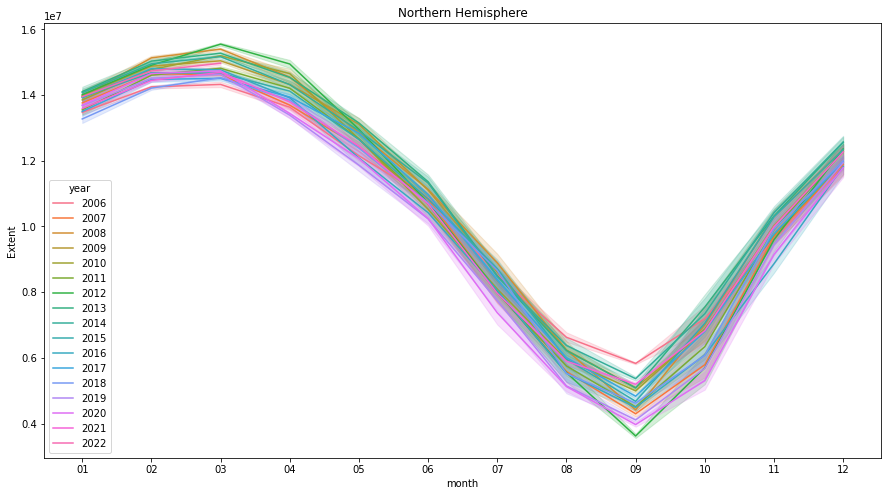

In [48]:
fig, ax = plt.subplots()
sns.lineplot(x='month', y='Northern_Hemisphere', data=df_m.reset_index(), hue='year', ax=ax)
ax.figure.set_figwidth(15)
ax.figure.set_figheight(8)
ax.set(title='Northern Hemisphere', ylabel='Extent');

Text(0.5, 0, 'Extend_Chukchi_Sea')

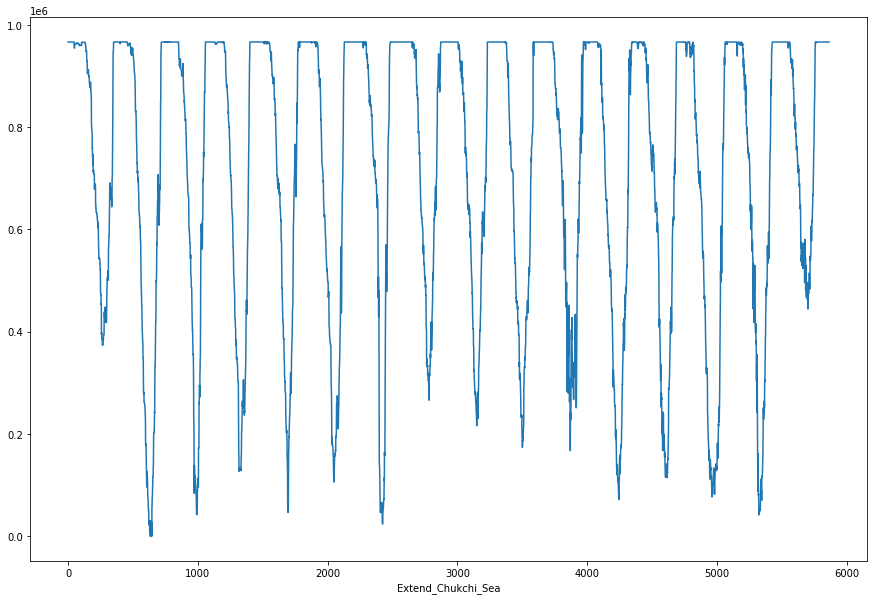

In [53]:
plt.figure(figsize=(15,10))
plt.plot(df_m.index,df_m['Chukchi_Sea'], label=' Chukchi_Sea')
plt.xlabel('Extend_Chukchi_Sea')

In [54]:
#sns.pairplot(df_m)

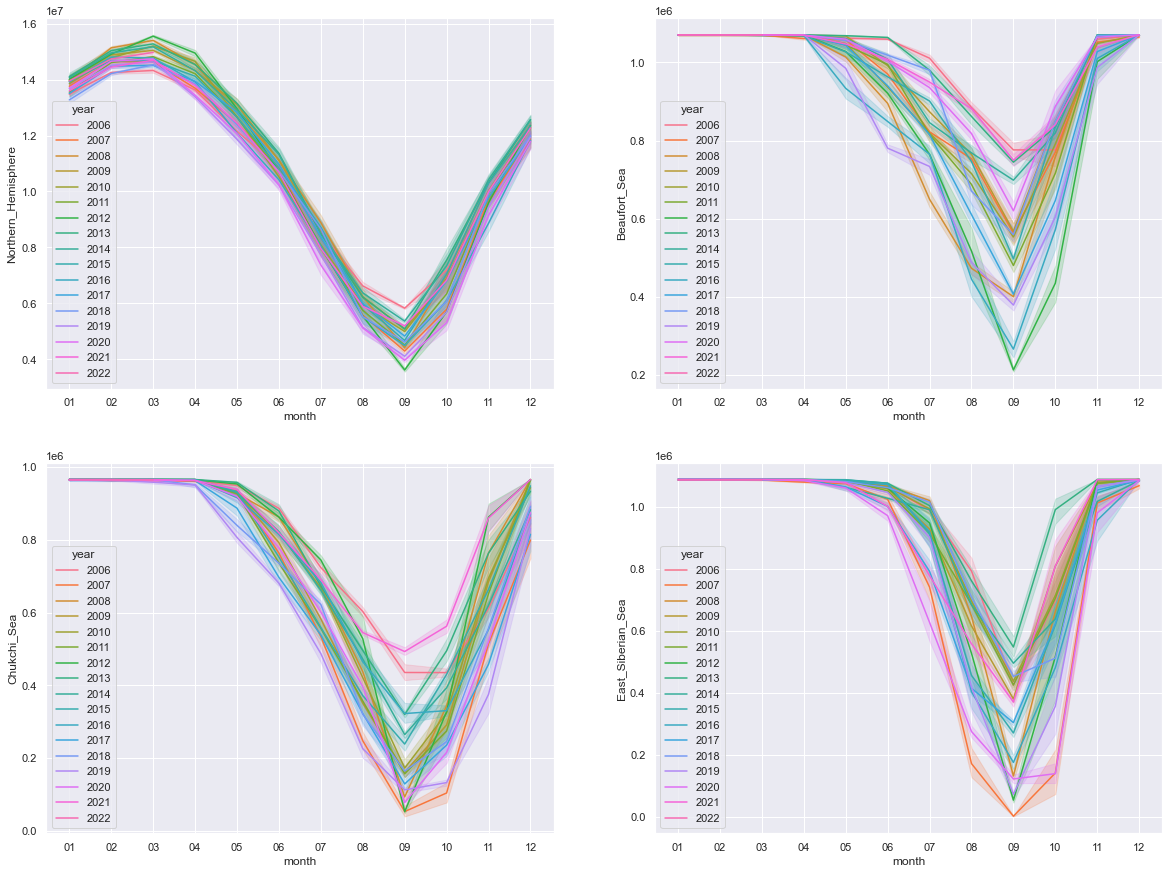

In [69]:
sns.set(style="darkgrid")
#df = sns.load_dataset("df_m")

fig, axs = plt.subplots(2, 2, figsize=(20, 15))

sns.lineplot(x='month', y='Northern_Hemisphere', data=df_m.reset_index(), hue='year', ax=axs[0, 0])
ax.set(title='Northern Hemisphere');

sns.lineplot(x='month', y='Beaufort_Sea', data=df_m.reset_index(), hue='year', ax=axs[0, 1])
ax.set(title='Beaufort_Sea');

sns.lineplot(x='month', y='Chukchi_Sea', data=df_m.reset_index(),  hue='year', ax=axs[1, 0])
sns.lineplot(x='month', y='East_Siberian_Sea', data=df_m.reset_index(),  hue='year', ax=axs[1, 1])

plt.show()

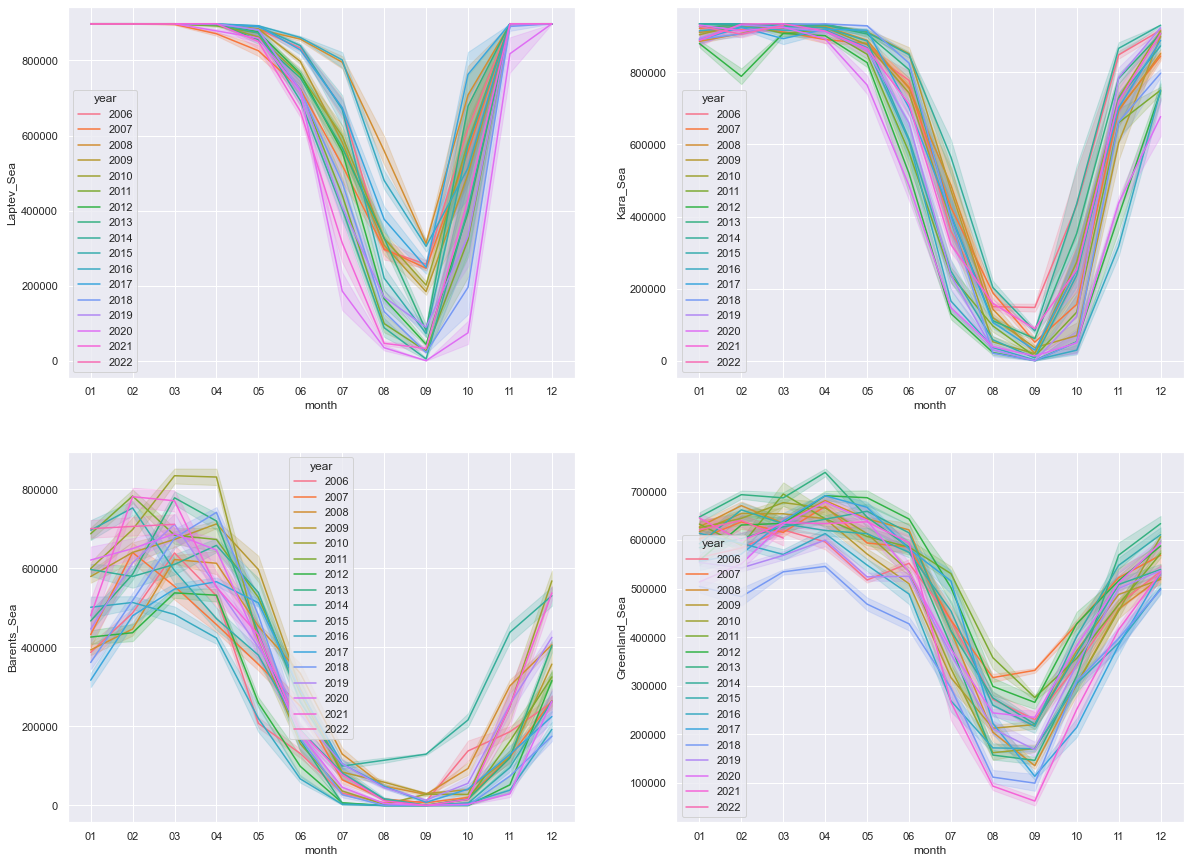

In [71]:
sns.set(style="darkgrid")

fig, axs = plt.subplots(2, 2, figsize=(20, 15))

sns.lineplot(x='month', y='Laptev_Sea', data=df_m.reset_index(), hue='year', ax=axs[0, 0])
ax.set(title='Laptev_Sea');

sns.lineplot(x='month', y='Kara_Sea', data=df_m.reset_index(), hue='year', ax=axs[0, 1])
ax.set(title='Kara_Sea');

sns.lineplot(x='month', y='Barents_Sea', data=df_m.reset_index(),  hue='year', ax=axs[1, 0])
sns.lineplot(x='month', y='Greenland_Sea', data=df_m.reset_index(),  hue='year', ax=axs[1, 1])

plt.show()

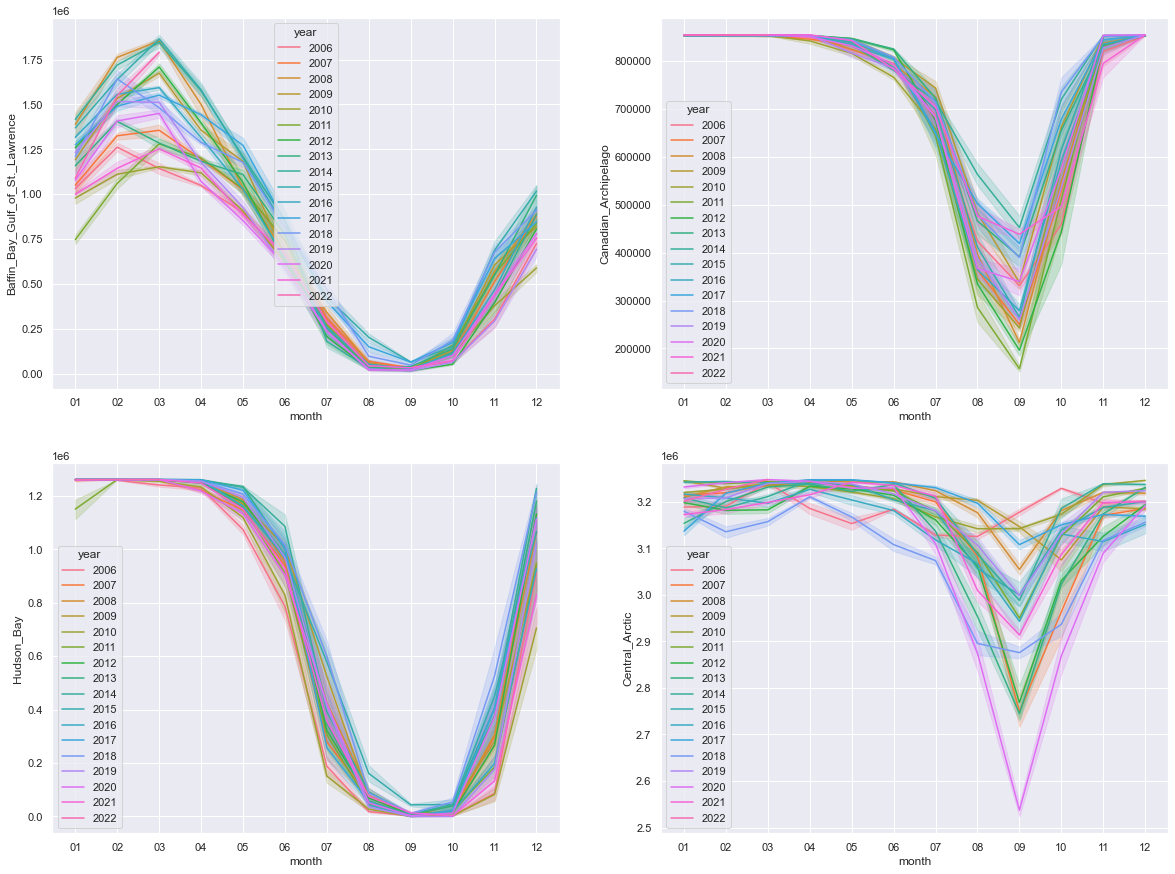

In [73]:
sns.set(style="darkgrid")

fig, axs = plt.subplots(2, 2, figsize=(20, 15))

sns.lineplot(x='month', y='Baffin_Bay_Gulf_of_St._Lawrence', data=df_m.reset_index(), hue='year', ax=axs[0, 0])
sns.lineplot(x='month', y='Canadian_Archipelago', data=df_m.reset_index(), hue='year', ax=axs[0, 1])
sns.lineplot(x='month', y='Hudson_Bay', data=df_m.reset_index(),  hue='year', ax=axs[1, 0])
sns.lineplot(x='month', y='Central_Arctic', data=df_m.reset_index(),  hue='year', ax=axs[1, 1])

plt.show()

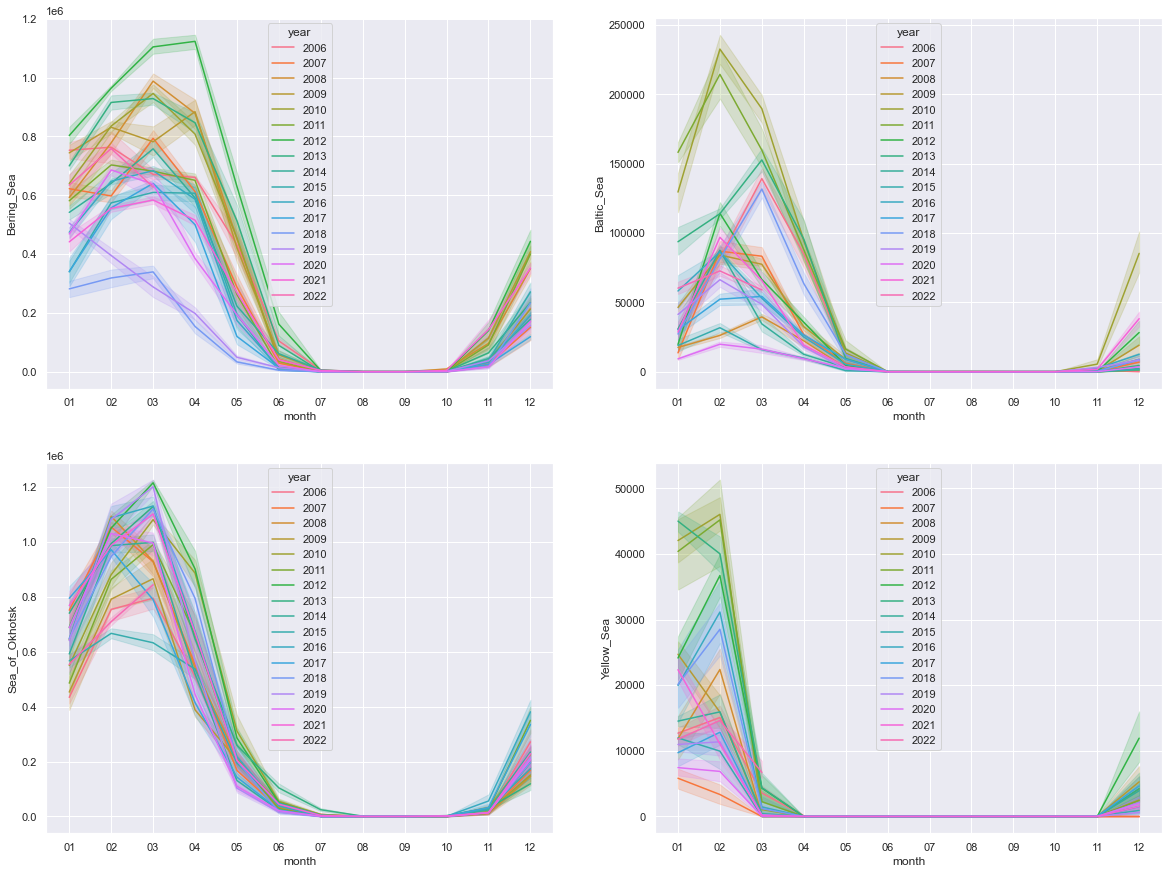

In [77]:
sns.set(style="darkgrid")



fig, axs = plt.subplots(2, 2, figsize=(20, 15))

sns.lineplot(x='month', y='Bering_Sea', data=df_m.reset_index(), hue='year', ax=axs[0, 0])
sns.lineplot(x='month', y='Baltic_Sea', data=df_m.reset_index(), hue='year', ax=axs[0, 1])
sns.lineplot(x='month', y='Sea_of_Okhotsk', data=df_m.reset_index(),  hue='year', ax=axs[1, 0])
sns.lineplot(x='month', y='Yellow_Sea', data=df_m.reset_index(),  hue='year', ax=axs[1, 1])


plt.show()

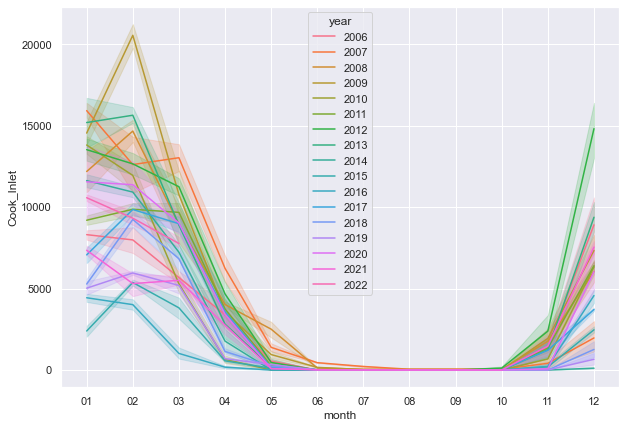

In [83]:
fig, axs = plt.subplots(figsize=(10, 7))
sns.lineplot(x='month', y='Cook_Inlet', data=df_m.reset_index(),  hue='year', ax=axs)
plt.show()